# Puntos criticos de funciones de 2 o mas variables

In [1]:
from sympy import symbols, Function, Eq, diff, solve, Matrix, hessian, sympify
from sympy.plotting import plot3d

In [2]:
x, y = symbols('x y')
f = Function('f')(x, y)
f

f(x, y)

## Obtener los puntos criticos de la siguinete funcion

In [3]:
expresion = x**2 - 2*x + (y**2)/4
Eq(f, expresion)

Eq(f(x, y), x**2 - 2*x + y**2/4)

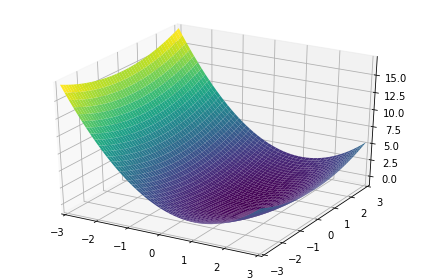

&lt;sympy.plotting.plot.Plot at 0x174297496d0&gt;

In [4]:
plot3d(expresion, (x, -3, 3), (y, -3, 3))

### Se obtinen las derivadas parciales para encontrar los puntos criticos

In [5]:
# Derivada paricial con repecto de x
u_x = f.diff(x)
x_derivada = diff(expresion, x)

Eq(u_x, x_derivada)

Eq(Derivative(f(x, y), x), 2*x - 2)

In [6]:
# Derivada paricial con repecto de y
u_y = f.diff(y)
y_derivada = diff(expresion, y)

Eq(u_y, y_derivada)

Eq(Derivative(f(x, y), y), y/2)

### Se obtienen los puntos criticos igualando la derivada a 0

In [7]:
x_p_Eq = Eq(x_derivada, 0)
display(x_p_Eq)
x_punto_critico = solve(x_p_Eq)[0]
display(Eq(x ,x_punto_critico))

Eq(2*x - 2, 0)

Eq(x, 1)

In [8]:
y_p_Eq = Eq(y_derivada, 0)
display(y_p_Eq)
y_punto_critico = solve(y_p_Eq)[0]
display(Eq(y, y_punto_critico))

Eq(y/2, 0)

Eq(y, 0)

In [9]:
punto_critico = (x_punto_critico, y_punto_critico)
display(punto_critico)

(1, 0)

## Para clasificar el punto critico se hace uso del determinante de la  Matriz Hessiana

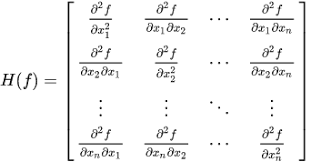

In [10]:
from IPython.display import Image
display(Image("img/matriz_hessiana.png"))

D es el determinante de la matriz hessiana

## Criterios de clasificacion
- Si D > 0 y fxx(a, b) < 0, entonces f(a, b) es un valor maximo local
- Si D > 0 y fxx(a, b) > 0, entonces f(a, b) es un valor minimo local
- Si D < 0, entonces f(a, b) es un punto de silla
- Si D = 0 el criterio no es concluyente

In [11]:
def matriz_hessiana(expresion, simbolos):
    """
        Recibe la expresion y los simbolos de sympy con los que va a construir la matriz

        Devuleve una Matriz hessiana
    """

    X = Matrix([s for s in simbolos])
    f = Matrix([expresion])

    return sympify(hessian(f, X))

In [12]:
m_hessiana = matriz_hessiana(expresion, (x, y))
m_hessiana

Matrix([
[2,   0],
[0, 1/2]])

In [13]:
D = m_hessiana.det()
D

1

In [14]:
fxx = diff(x_derivada)
fxx

2

In [15]:
def clasificar_puntos(puntos: list, D, fxx):
    for punto in puntos:
        if D == 0:
            print(punto, 'no es concluyente.')
        elif D < 0:
            print(punto, 'es un punto de silla')
        elif D > 0:
            if fxx.evalf(subs=punto) < 0:
                print(punto, 'es un punto maximo local')
            else:
                print(punto, 'es un punto minimo local')
            

In [16]:
clasificar_puntos([{x: punto_critico[0], y: punto_critico[1]}], D, fxx)

{x: 1, y: 0} es un punto minimo local


# Funcion y su punto critico

Text(0.5, 0, &#39;z&#39;)

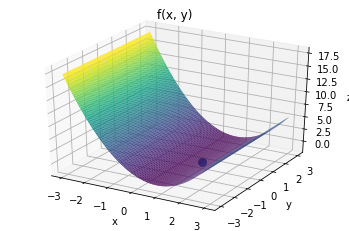

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_lim = np.linspace(-3, 3, 100)
Y_lim = np.linspace(-3, 3, 100)

def f(X, Y):
    return X**2 - 2*X + (X**2)/4

X, Y = np.meshgrid(X_lim, Y_lim)
Z = f(X, Y)

ax =  plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

# Punto critico
x =[1]
y =[0]
z =[-1]

ax.scatter3D(x, y, z, linewidth=4.5, cmap='viridis')

ax.set_title('f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')